# Esercitazione 10
2 - 5 Maggio 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as spLin
import RisolviSis

### Codice EquazioniNormali
Implementare la function  **eqnorm(A,b)** che implementa il metodo delle equazioni normali per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare 

In [2]:
def eqnorm(A,b):
    """Risolve un sistema lineare con matrice A definita positiva

    Args:
        A: matrice definita positiva
        b: termine noto

    Returns:
        Ritora la soluzione del sistema lineare
    """
    G=A.T@A
    y=A.T@b
    L=spLin.cholesky(G, lower=True)
    z, flag=RisolviSis.Lsolve(L,y)
    if flag==0:
        x, flag=RisolviSis.Usolve(L.T,z)
    
    return x

### Codice QRLS
Implementare la function  **qrLS(A,b)** che utilizza il metodo QR per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [3]:
def qrLS(A,b):
    n=A.shape[1]
    Q,R=spLin.qr(A)
    h=Q.T@b
    x, flag=RisolviSis.Usolve(R[0:n,:],h[0:n])
    residuo=np.linalg.norm(h[n:])
    return x, residuo

### Codice SVDLS
Implementare la function  **svdLS(A,b)** che utilizza  il metodo SVD per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.



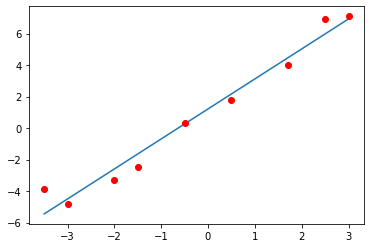

Errore di regressione:  2.225897086364276
Residuo:  2.2258970863642773


In [4]:
x = np.array([-3.5, -3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3])
y = np.array([-3.9, -4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1])
m = x.shape[0]
n=1 #Grado del polinomio di regressione
n1=n+1 #Gradi di libertà del polinomio di grado n (ordine)
B=np.vander(x,n1,increasing=True)[:,:n1] #Matrice di Vandermonde, prendiamo solo le prime n1 colonne
#a=eqnorm(B,y) #Calcolo dei coefficienti del polinomio di grado n
a, residuo=qrLS(B,y)
xv=np.linspace(np.min(x), np.max(x), 200) #Valori di x per il grafico
pol1=np.polyval(np.flip(a),xv) #Valori del polinomio di grado n nei punti xv
plt.plot(xv, pol1, x, y, 'ro')
plt.show()

errore=np.linalg.norm(y-np.polyval(np.flip(a),x)) #Errore di regressione
print('Errore di regressione: ', errore)
print('Residuo: ', residuo)

## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).



## Esercizio 3:
Scrivere uno script Python per approssimare la seguente configurazione di punti

$$
\begin{array}{l}
x = [10 \, : \, 0.5/5 \, : \, 10.5] ;\\
y = [11.0320, \, 11.1263, \, 11.1339, \, 11.1339, \, 11.1993, \, 11.1844] ;
\end{array}
$$

mediante un polinomio ai minimi quadrati di grado 4 costruito  con il metodo
delle equazioni normali, con il metodo QRLS e con il metodo SVDLS.
Perturbare poi il secondo punto nel seguente modo
$$x(1) = x(1) + 0.013; \quad y(1) = y(1) - 0.001;$$
e calcolare i polinomi ai minimi quadrati relativi alla
configurazione perturbata. Commentare e motivare i risultati ottenuti.

